In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
cd 'drive/My Drive/ECPR_winter2021_kermer/LECTURE_4/'

/content/drive/My Drive/ECPR_winter2021_kermer/LECTURE_4


In [ ]:
pwd

'/content/drive/My Drive/ECPR_winter2021_kermer/LECTURE_4'

# Analyze the data we collected during Lecture 3.

- read in grouped "grouped_data_blink.csv" data file and visualize popularity  by year
- analyze the popularity of stylistic elements over the years (how the average is changing by years/albums)
- read_in "all_albums.csv" and visualize the average and standard deviation of the stylistic elements by years (Hints: bar chart with error bars, grouped by)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# Read csv file
readcsv = pd.read_csv("grouped_Blink182.csv")


In [ ]:
# Make df
df = pd.DataFrame(readcsv) 

df

,album_name,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,Blink 182 (Sound and Vision Q4 2007) [Internat...,0.120504,0.442837,0.790245,0.001089,0.481414,-7.921347,0.259965,125.240449,0.432655,3.448980
1,California,0.007927,0.474571,0.907048,0.000247,0.202586,-3.575286,0.095905,142.014000,0.470762,44.047619
2,California (Deluxe Edition),0.034561,0.465786,0.904607,0.000244,0.212614,-3.627321,0.092150,137.819250,0.442536,42.250000
3,California (Deluxe),0.045384,0.473639,0.890500,0.000276,0.223458,-3.925694,0.088056,138.790056,0.447917,4.444444
4,NINE,0.018838,0.522867,0.854800,0.000005,0.208887,-4.805267,0.080053,147.870267,0.472333,54.933333
5,Neighborhoods (Deluxe Explicit Version),0.075096,0.498786,0.871071,0.069284,0.133650,-5.552500,0.054043,128.912714,0.445236,0.071429
6,Neighborhoods (Deluxe Version),0.075330,0.518071,0.871429,0.070309,0.151571,-5.555214,0.053936,137.493429,0.441629,17.071429
7,Neighborhoods (Deluxe),0.075096,0.498786,0.871071,0.069284,0.133650,-5.552500,0.054043,128.912714,0.445236,41.571429
8,Take Off Your Pants And Jacket,0.002515,0.500286,0.936214,0.043251,0.271800,-3.752571,0.063314,133.834357,0.665714,18.071429
9,"The Mark, Tom And Travis Show (The Enema Strik...",0.031387,0.383857,0.921429,0.003809,0.709700,-5.654905,0.186324,136.840571,0.360133,38.619048


In [ ]:
# Using DataFrame.insert('year') to add a column. N.B Years are artificial.
df.insert(11, "Year", [2007, 2010, 2009, 2003, 1995, 1997, 2017, 2016, 1994, 2005, 1999], True)

df

,album_name,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,Year
0,Blink 182 (Sound and Vision Q4 2007) [Internat...,0.120504,0.442837,0.790245,0.001089,0.481414,-7.921347,0.259965,125.240449,0.432655,3.448980,2007
1,California,0.007927,0.474571,0.907048,0.000247,0.202586,-3.575286,0.095905,142.014000,0.470762,44.047619,2010
2,California (Deluxe Edition),0.034561,0.465786,0.904607,0.000244,0.212614,-3.627321,0.092150,137.819250,0.442536,42.250000,2009
3,California (Deluxe),0.045384,0.473639,0.890500,0.000276,0.223458,-3.925694,0.088056,138.790056,0.447917,4.444444,2003
4,NINE,0.018838,0.522867,0.854800,0.000005,0.208887,-4.805267,0.080053,147.870267,0.472333,54.933333,1995
5,Neighborhoods (Deluxe Explicit Version),0.075096,0.498786,0.871071,0.069284,0.133650,-5.552500,0.054043,128.912714,0.445236,0.071429,1997
6,Neighborhoods (Deluxe Version),0.075330,0.518071,0.871429,0.070309,0.151571,-5.555214,0.053936,137.493429,0.441629,17.071429,2017
7,Neighborhoods (Deluxe),0.075096,0.498786,0.871071,0.069284,0.133650,-5.552500,0.054043,128.912714,0.445236,41.571429,2016
8,Take Off Your Pants And Jacket,0.002515,0.500286,0.936214,0.043251,0.271800,-3.752571,0.063314,133.834357,0.665714,18.071429,1994
9,"The Mark, Tom And Travis Show (The Enema Strik...",0.031387,0.383857,0.921429,0.003809,0.709700,-5.654905,0.186324,136.840571,0.360133,38.619048,2005


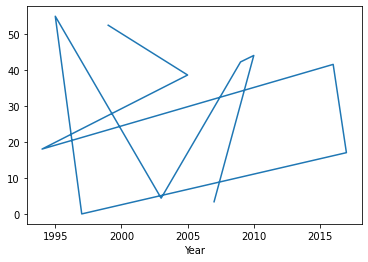

In [ ]:
import matplotlib.pyplot as plt
df.set_index('Year')['popularity'].plot() #To imptove it you can sort the dataframe by year and plot it, you can do it in the same line with:
#df.sort_values('Year').set_index('Year')['popularity'].plot()

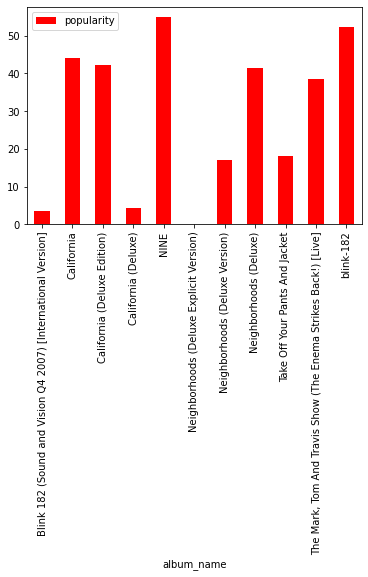

In [ ]:
import datetime
df.plot.bar('album_name', 'popularity', fc="red" )


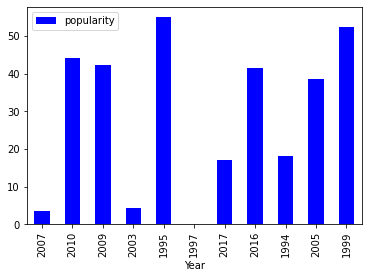

In [ ]:
df.plot.bar('Year', 'popularity', fc="blue" )


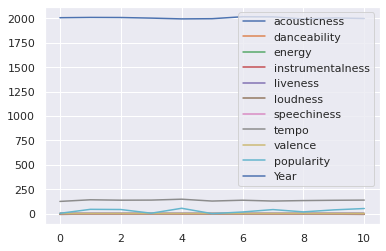

In [ ]:
import seaborn as sns
sns.set()

df.plot()

In [ ]:
df.describe()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,Year
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,0.052384,0.476948,0.875754,0.030415,0.269198,-5.231083,0.099427,136.042340,0.461610,28.815149,2004.727273
std,0.037389,0.039203,0.043921,0.034854,0.174479,1.510547,0.065200,6.476852,0.073854,20.563208,7.963553
min,0.002515,0.383857,0.790245,0.000005,0.133650,-7.921347,0.053936,125.240449,0.360133,0.071429,1994.000000
25%,0.025112,0.466362,0.862936,0.000261,0.177079,-5.605060,0.058679,131.373536,0.442082,10.757937,1998.000000
50%,0.045384,0.474571,0.871429,0.003809,0.212614,-5.552500,0.080053,137.493429,0.445236,38.619048,2005.000000
75%,0.075213,0.499536,0.905827,0.069284,0.251822,-3.839133,0.094027,138.763997,0.462162,43.148810,2009.500000
max,0.120504,0.522867,0.936214,0.076768,0.709700,-3.575286,0.259965,147.870267,0.665714,54.933333,2017.000000


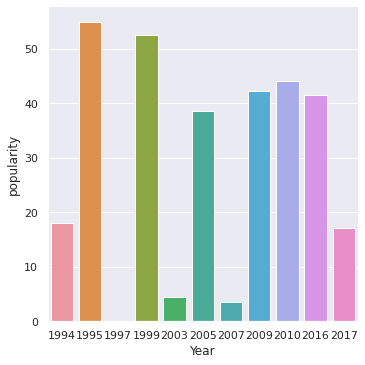

In [ ]:
sns.catplot(x="Year", y="popularity",
            kind="bar", data=df);

In [ ]:
sns.catplot(x="album_name", y="popularity",
            kind="bar", data=df);

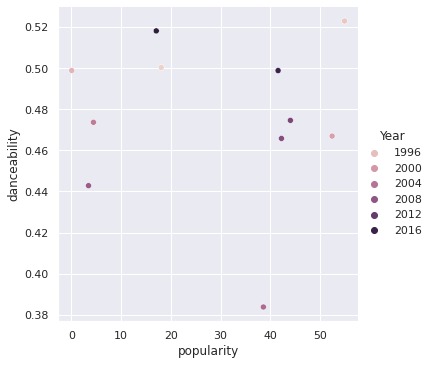

In [ ]:
# Examine whether correlation b/w popularity and danceability 
sns.relplot(x="popularity", y="danceability",
            hue="Year", data=df);

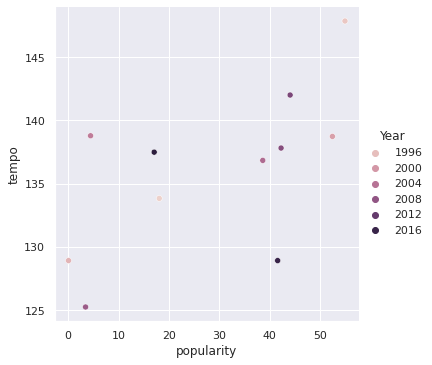

In [ ]:
sns.relplot(x="popularity", y="tempo",
            hue="Year", data=df);

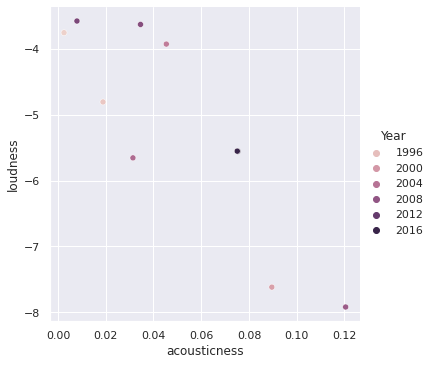

In [ ]:
# Acousticness seems to be negatively correlated to loudness, as one would expect. Obviously dataset 
# is still too small to be sure. 
sns.relplot(x="acousticness", y="loudness",
            hue="Year", data=df);

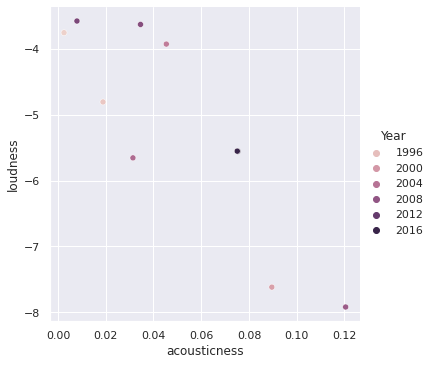

In [ ]:
# Acousticness seems to be negatively correlated to loudness, as one would expect. Obviously dataset 
# is still too small to be sure. 
sns.relplot(x="acousticness", y="loudness",
            hue="Year", data=df);

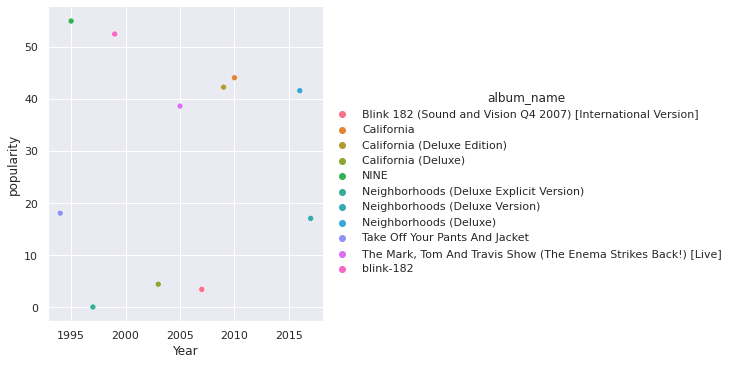

In [ ]:
# Is there a correlation between popularity and year when album was released? The results using scatterplot reveal there
# is no correlation, which is no surprise as Year date was randomly assigned by me.

sns.relplot(x="Year", y="popularity",
            hue="album_name", data=df);

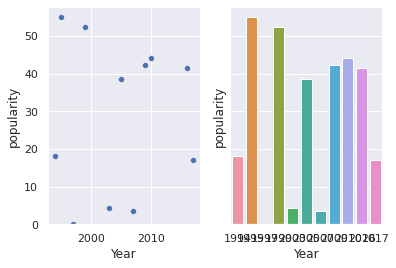

In [ ]:
# Subplotting with one barplot and one scatterplot
import matplotlib.pyplot as plt
f, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.barplot(x="Year", y="popularity", data=df, ax=axes[1])
sns.scatterplot(x="Year", y="popularity", data=df, ax=axes[0]);

# Nice work!
I left a comment on the first plot on how to improve it sorting it by year.